In [89]:
import pandas as pd
import os
import numpy as np

In [90]:
npkc_df = pd.read_csv("data/groundtruth/1.3.csv")
npkc_df = npkc_df.dropna()
npkc_df['Name'] = npkc_df['Replicate']+'.'+npkc_df['Sub-Replicate'].astype(int).astype(str)
npkc_df = npkc_df.drop(columns=['Replicate', 'Sub-Replicate'])
npkc_df

,P,K,N,C,Name
0,2246.5,12149.0,5659.95,30.3,T1.1
1,1931.9,11667.0,16330.90,30.1,T1.2
2,1896.6,11721.0,18640.09,28.9,T1.3
3,1291.7,6485.4,15274.07,28.7,T2.1
4,1520.4,8725.3,10500.92,29.1,T2.2
...,...,...,...,...,...
166,4411.3,12017.0,21248.54,32.8,BC2.1
167,4436.7,13939.0,8931.01,41.5,BC3.1
168,6789.8,12909.0,39077.62,39.9,BC4.1
169,5625.0,10777.0,22944.83,40.6,BC5.1


In [91]:
filenames = os.listdir("data/1.3/")
_ = []
for name in filenames:
    if name.endswith('.sed'):
        _.append(name)
filenames=_
new_filenames = []
for i,name in enumerate(filenames):
    new_filenames.append(name.replace("_","."))

In [92]:
new_filenames

['1726293.90551.BC4.sed',
 '1726293.90526.J21.1.sed',
 '1726293.90385.T8.1.sed',
 '1726293.90487.T12.1.sed',
 '1726293.90549.BC2.sed',
 '1726293.90423.T25.3.sed',
 '1726293.90520.J25.1.sed',
 '1726293.90404.T3.2.sed',
 '1726293.90450.J6.3.sed',
 '1726293.90490.T18.1.sed',
 '1726293.90544.J20.2.sed',
 '1726293.90541.J13.2.sed',
 '1726293.90393.T23.3.sed',
 '1726293.90531.J14.3.sed',
 '1726293.90480.J4.3.sed',
 '1726293.90397.T11.1.sed',
 '1726293.90390.T1.3.sed',
 '1726293.90475.J5.1.sed',
 '1726293.90405.T3.3.sed',
 '1726293.90409.T6.1.sed',
 '1726293.90550.BC3.sed',
 '1726293.90534.J7.3.sed',
 '1726293.90460.T20.1.sed',
 '1726293.90519.J22.3.sed',
 '1726293.90535.J1.1.sed',
 '1726293.90454.J19.1.sed',
 '1726293.90510.J2.3.sed',
 '1726293.90479.J4.2.sed',
 '1726293.90413.T10.2.sed',
 '1726293.90430.T24.1.sed',
 '1726293.90468.T13.3.sed',
 '1726293.90415.T16.1.sed',
 '1726293.90504.J9.3.sed',
 '1726293.90499.J16.1.sed',
 '1726293.90425.T27.2.sed',
 '1726293.90408.T2.3.sed',
 '1726293.90

In [109]:
X = []
N = []
C = []
P = []
K = []

for i, (old, new) in enumerate(zip(filenames, new_filenames)):
    data = []
    f = open("data/1.3/"+old, "r")
    lines = f.readlines()[27:]
    for line in lines:
        data.append(float(line.strip()[35:]))
    data = np.array(data)
    X.append(data)
    name = new[14:][:-4]
    if name.endswith('a') or name.endswith('b'):
        name = name[:-1]
    if name.startswith("BC"):
        name = name[:3]
    flag = 0
    for npk in npkc_df.iloc():
        if name in npk['Name']:
            N.append(npk['N'])
            P.append(npk['P'])
            K.append(npk['K'])
            C.append(npk['C'])
            flag=1
            break
    if flag == 0:
        X.pop(-1)
    print(i, old, npk['N'])
    
    

0 1726293_90551_BC4.sed 39077.62
1 1726293_90526_J21_1.sed 12050.02
2 1726293_90385_T8_1.sed 6027.99
3 1726293_90487_T12_1.sed 10851.87
4 1726293_90549_BC2.sed 21248.54
5 1726293_90423_T25_3.sed 9426.18
6 1726293_90520_J25_1.sed 8099.36
7 1726293_90404_T3_2.sed 4251.95
8 1726293_90450_J6_3.sed 10321.65
9 1726293_90490_T18_1.sed 7786.19
10 1726293_90544_J20_2.sed 13290.48
11 1726293_90541_J13_2.sed 18855.59
12 1726293_90393_T23_3.sed 27115.51
13 1726293_90531_J14_3.sed 14582.91
14 1726293_90480_J4_3.sed 17593.68
15 1726293_90397_T11_1.sed 19145.75
16 1726293_90390_T1_3.sed 18640.09
17 1726293_90475_J5_1.sed 6913.39
18 1726293_90405_T3_3.sed 8932.2
19 1726293_90409_T6_1.sed 20491.82
20 1726293_90550_BC3.sed 8931.01
21 1726293_90534_J7_3.sed 3135.04
22 1726293_90460_T20_1.sed 6619.2
23 1726293_90519_J22_3.sed 17183.12
24 1726293_90535_J1_1.sed 4209.88
25 1726293_90454_J19_1.sed 35286.45
26 1726293_90510_J2_3.sed 6606.82
27 1726293_90479_J4_2.sed 5469.48
28 1726293_90413_T10_2.sed 3904.02


In [110]:
X = np.array(X)
N = np.array(N)
P = np.array(P)
K = np.array(K)
C = np.array(C)


In [111]:
X.shape, N.shape, P.shape, K.shape, C.shape

((171, 2151), (171,), (171,), (171,), (171,))

In [112]:
np.save("data/X1.3.npy", X, allow_pickle=True)
np.save("data/N1.3.npy", N, allow_pickle=True)
np.save("data/P1.3.npy", P, allow_pickle=True)
np.save("data/K1.3.npy", K, allow_pickle=True)
np.save("data/C1.3.npy", C, allow_pickle=True)

In [74]:
X.shape

(172, 2151)

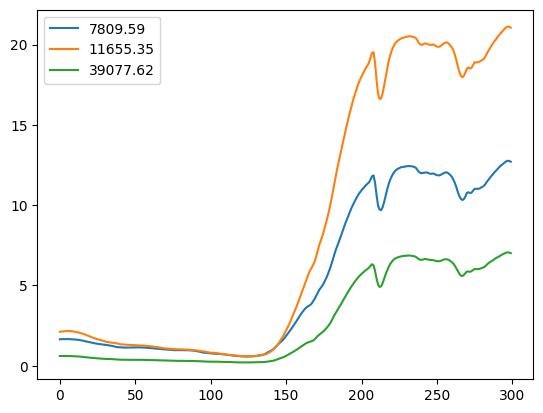

In [88]:
y=N

# plt.plot(X[np.argsort(y)][0][200:300], label = y[np.argsort(y)][0])
plt.plot(X[np.argsort(y)][43][200:500], label = y[np.argsort(y)][43])
plt.plot(X[np.argsort(y)][86][200:500], label = y[np.argsort(y)][86])
plt.plot(X[np.argsort(y)][-1][200:500], label = y[np.argsort(y)][-1])
plt.legend()
plt.show()

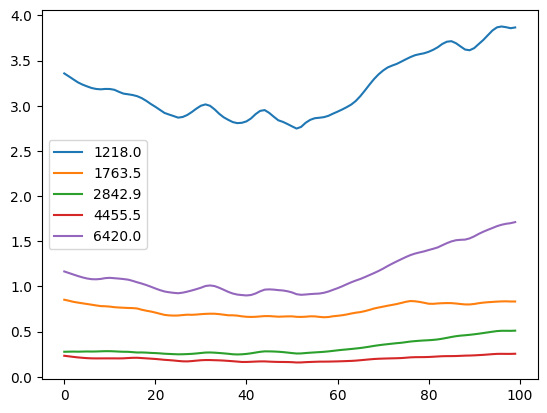

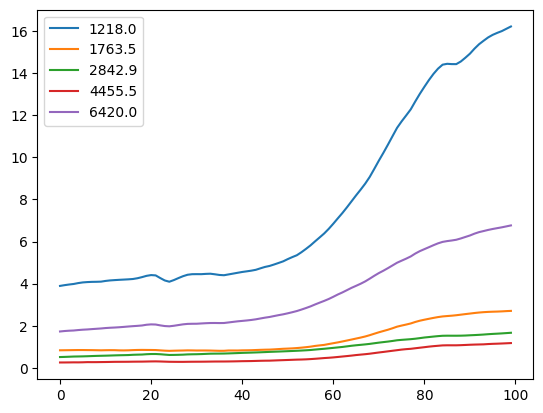

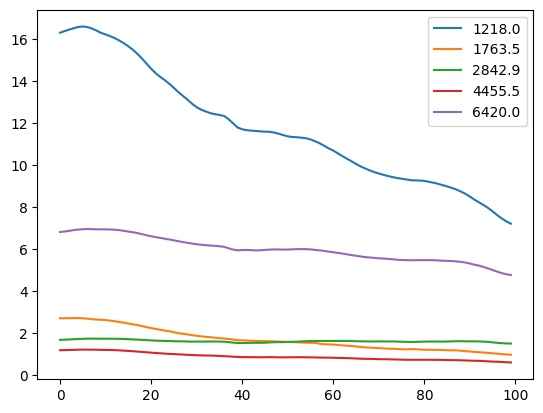

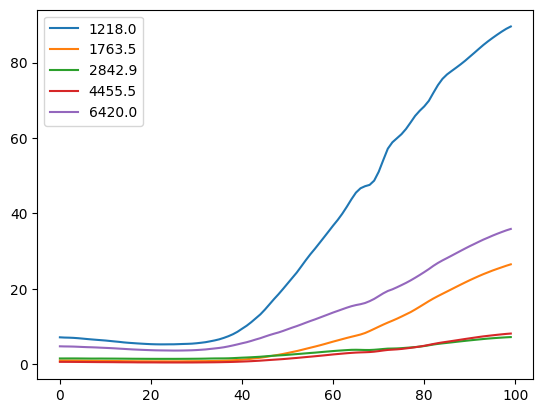

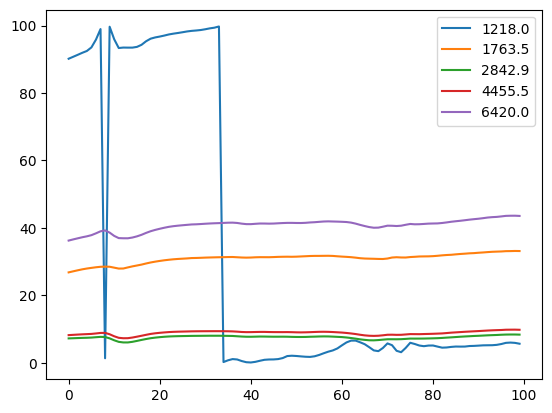

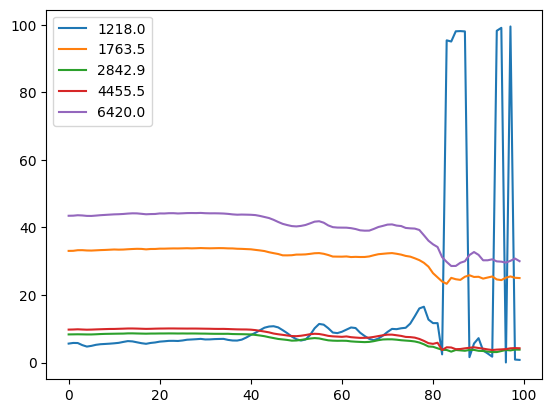

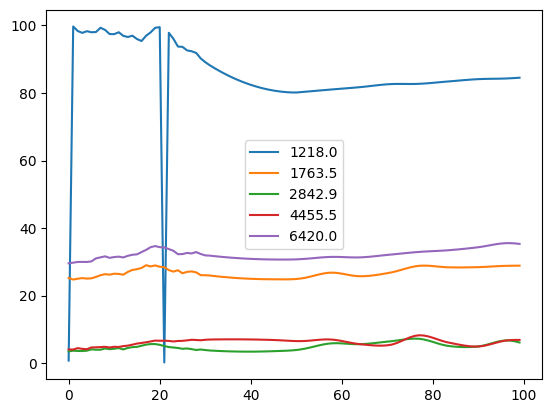

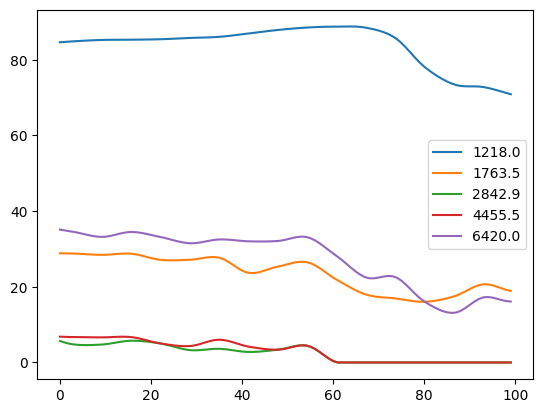

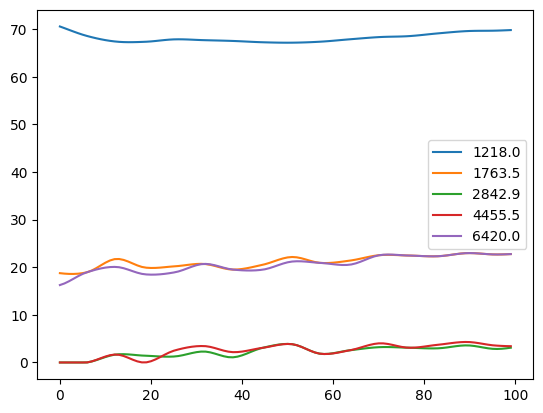

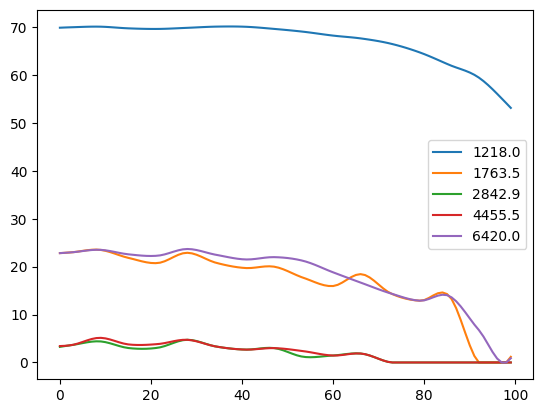

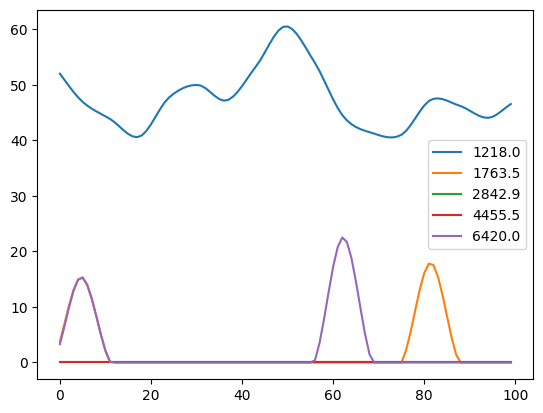

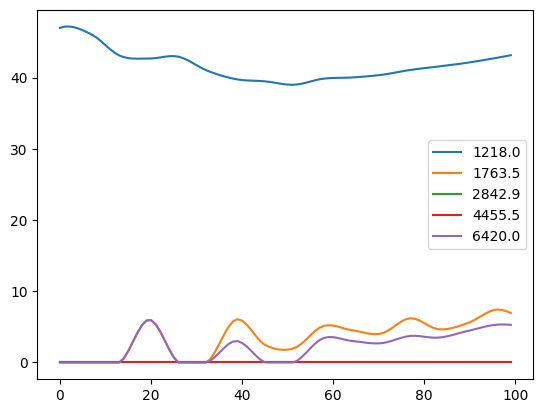

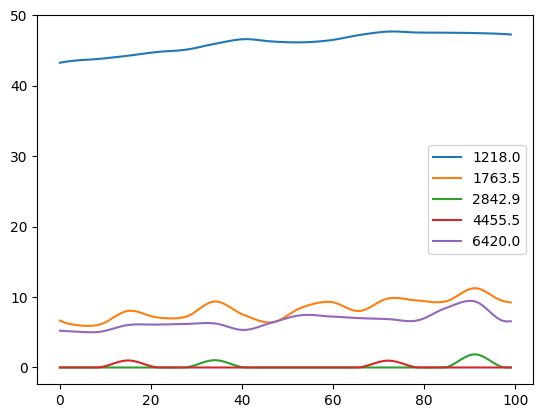

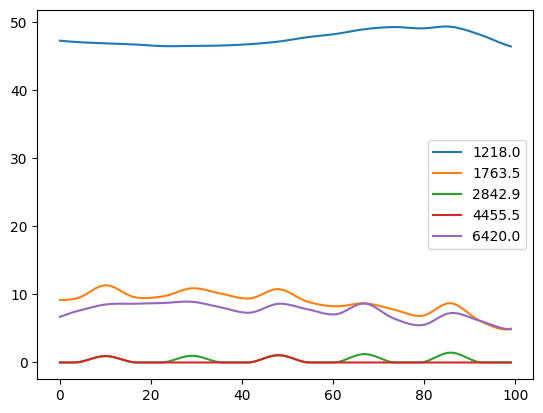

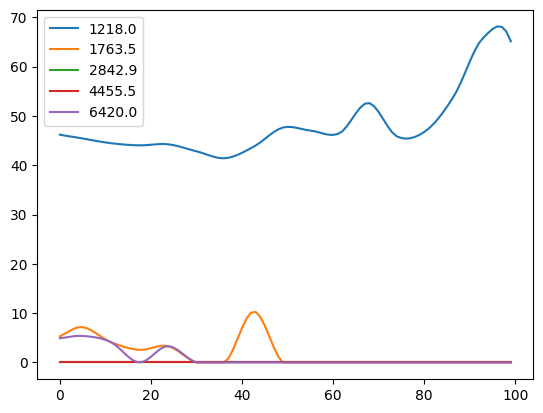

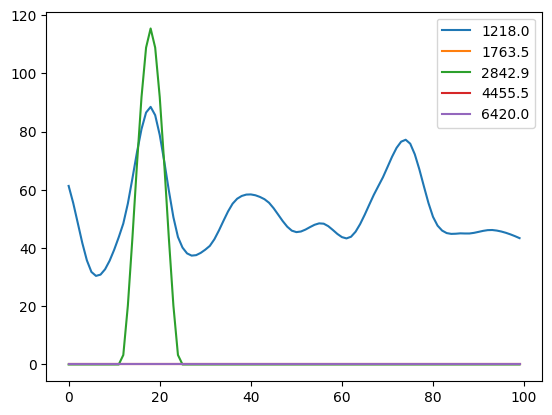

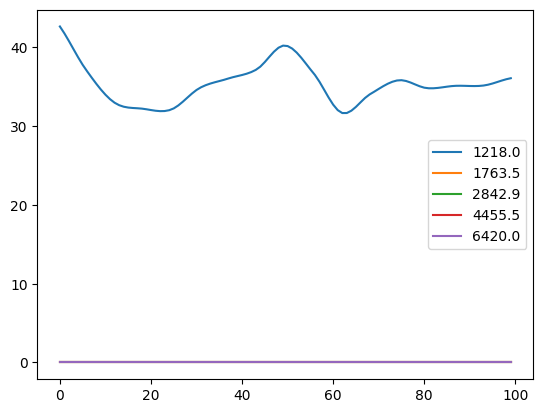

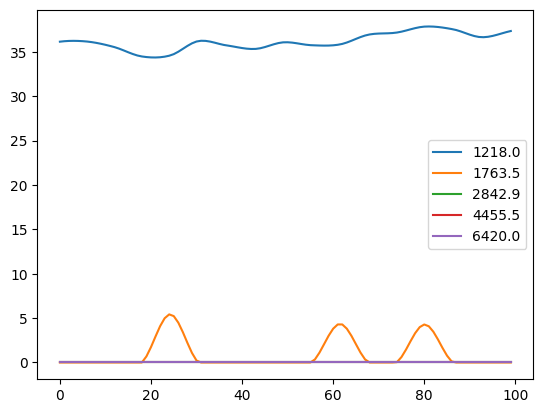

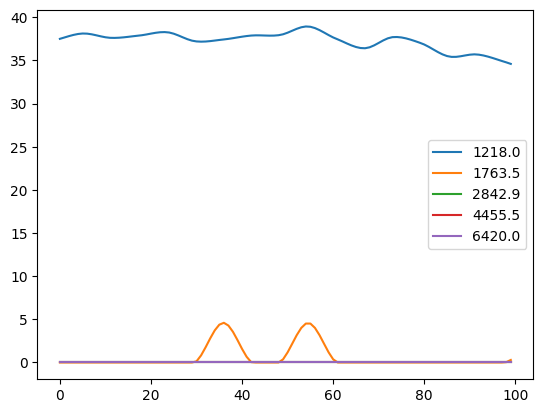

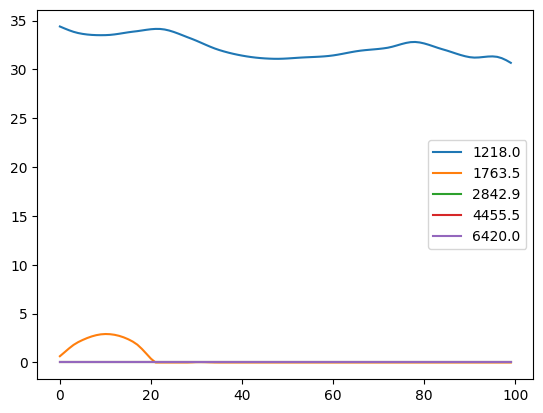

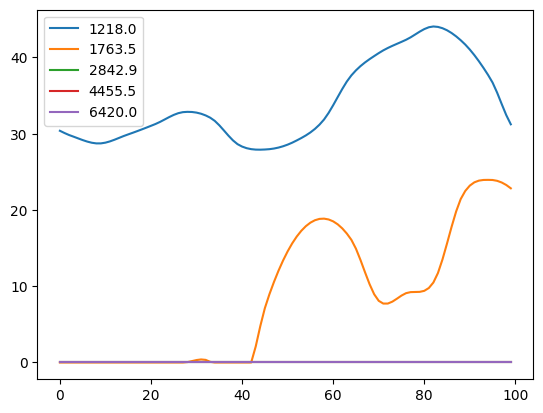

In [63]:
X = np.load("data/X1.3.npy", mmap_mode='r')
N = np.load("data/N1.3.npy", mmap_mode='r')
P = np.load("data/P1.3.npy", mmap_mode='r')
K = np.load("data/K1.3.npy", mmap_mode='r')
C = np.load("data/C1.3.npy", mmap_mode='r')

y = P

import matplotlib.pyplot as plt
for i in range(0,2100,100):
    plt.plot(X[np.argsort(y)][0][i:i+100], label=y[np.argsort(y)][0])
    plt.plot(X[np.argsort(y)][42][i:i+100], label=y[np.argsort(y)][42])
    plt.plot(X[np.argsort(y)][84][i:i+100], label=y[np.argsort(y)][84])
    plt.plot(X[np.argsort(y)][126][i:i+100], label=y[np.argsort(y)][126])
    plt.plot(X[np.argsort(y)][167][i:i+100], label=y[np.argsort(y)][167])
    plt.legend()
    plt.show()